<a href="https://colab.research.google.com/github/gibulent/blog/blob/main/fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import soundfile as sf
from scipy import fftpack

In [ ]:
ipd.Audio('/content/a1.wav')

In [ ]:
    y ,sr= librosa.load('/content/a1.wav')
    sig=librosa.resample(y, orig_sr=sr, target_sr=4000)
    sr=4000
    print(y.shape)
    sf.write('a11.wav', sig, sr, subtype='PCM_24')
    ipd.Audio('/content/a11.wav')

(88704,)


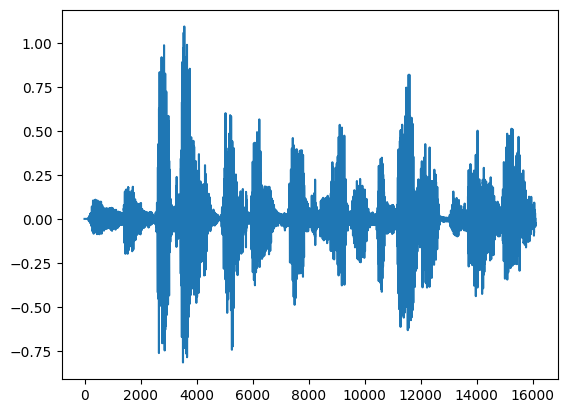

In [ ]:
time_mock = np.arange(len(sig))
plt.plot(time_mock, sig)
plt.show()

# **Optianaly Add Noise**

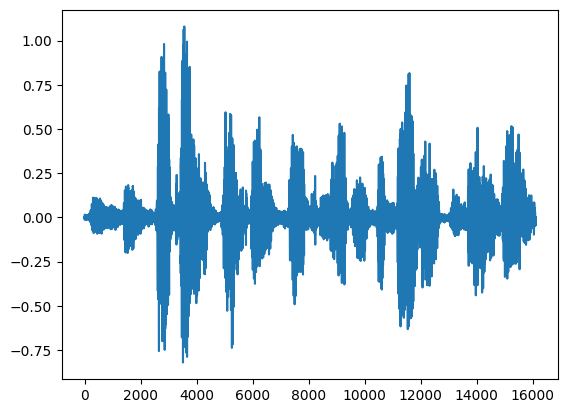

In [ ]:
aRandom = .006*np.random.randn(len(sig))
sig_with_noise = sig + aRandom

plt.plot(time_mock, sig_with_noise)
# plt.plot(time_mock, sig)
sf.write('with_noise.wav', sig_with_noise, sr, subtype='PCM_24')
plt.show()


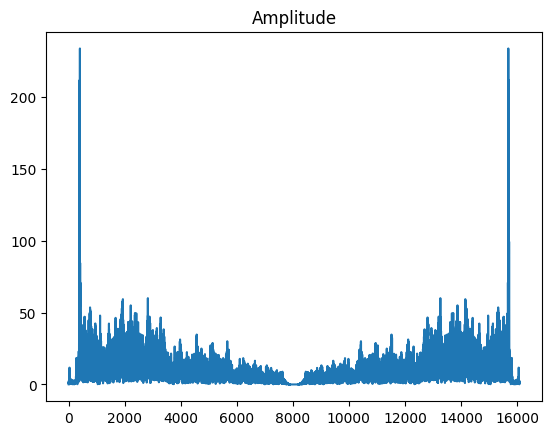

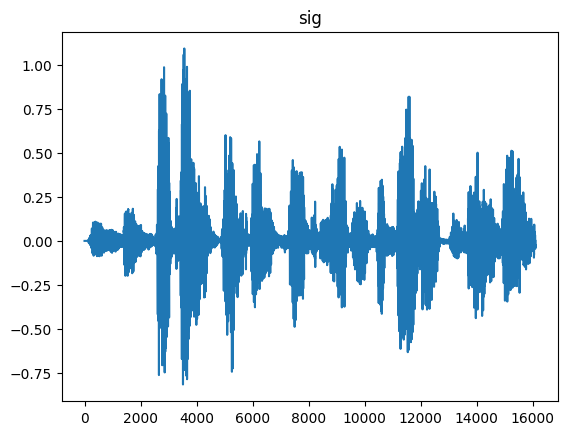

In [ ]:
sig_fft = fftpack.fft(sig)
Amplitude = np.abs(sig_fft)

plt.plot(time_mock, Amplitude)
plt.title("Amplitude")
plt.show()

plt.plot(time_mock, sig)
plt.title("sig")
plt.show()


In [ ]:
sf.write('with.wav', np.abs(fftpack.ifft(sig_fft)), sr, subtype='PCM_24')
ipd.Audio('/content/with.wav')
# print(sig_fft[3000:3002])
print(sig[1000:1002])
print(np.abs(sig_fft[1000:1002]))


[0.06192088 0.04520385]
[20.581728 11.06711 ]


In [ ]:
Amplitude_sorted = np.unique(np.sort(Amplitude))
Amplitude_sorted =Amplitude_sorted[::-1]
print(len(Amplitude_sorted))

8046


In [ ]:

max_indices=[]
for i in np.arange(7800):
  max_indices.append(np.where(Amplitude == Amplitude_sorted[i]))

fff = np.zeros(len(sig),dtype=complex)

lm =np.arange(len(max_indices)-1)
ls=np.arange(len(sig))
for j in lm:
  for i in ls:
    if i == max_indices[j][0][0] or i == max_indices[j][0][1] :
      fff[i]=sig_fft[i]
    else:
      continue




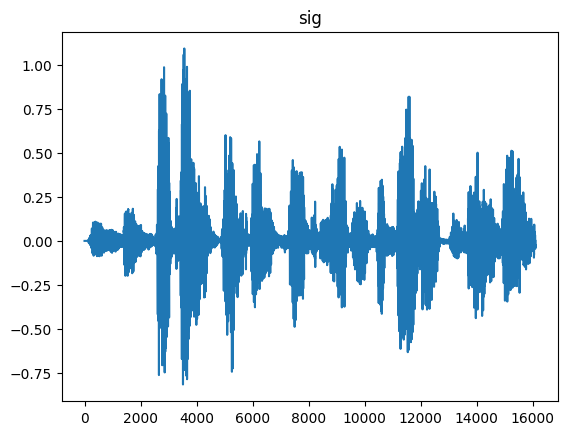

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


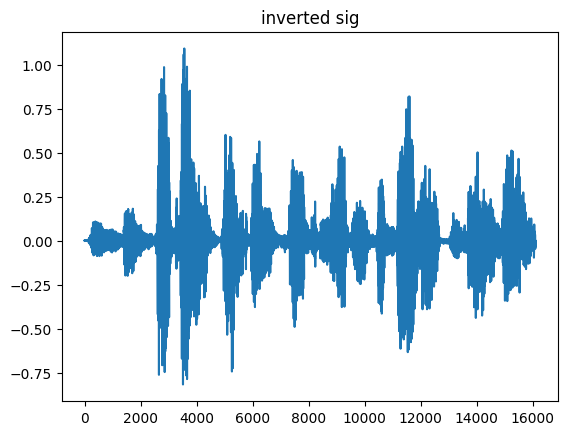

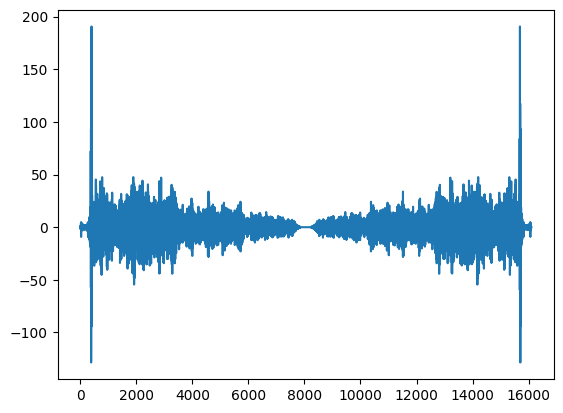

In [ ]:
plt.plot(time_mock, sig)
plt.title("sig")
plt.show()
plt.plot( np.arange(len(fff)),fftpack.ifft(fff))
plt.title("inverted sig")
plt.show()
plt.plot( np.arange(len(fff)),fff)
plt.show()

In [ ]:
ffa = np.abs(fftpack.ifft(fff))
sf.write('with.wav', ffa, sr, subtype='PCM_24')
ipd.Audio('/content/with.wav')

In [ ]:
ffs=ffa
for i in np.arange(len(sig)) :
  if sig[i] < 0 :
    ffs[i] = -ffa[i]


In [ ]:
print(sig[3003:3008])
print(ffs[3003:3008])


[-0.12882602 -0.2817562  -0.32839358  0.21983194  0.55334747]
[-0.12896838 -0.28056126 -0.32874936  0.21908878  0.55451993]


In [ ]:
sf.write('with.wav', ffs, sr, subtype='PCM_24')
ipd.Audio('/content/with.wav')